<a href="https://colab.research.google.com/github/dip-prog/Hacktoberfest_2021/blob/main/MNIST_DATASET_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the dependencies
#cv2 has been used for computer vision
#keras is an extended version of tensorflow, where tensorflo is not able to work , keras starts working
#mnist dataset is inbuilt within keras
# random.set_seed is used as random state in ML to generate random numbers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import google.colab.patches
from PIL import Image
import tensorflow as  tf
tf.random.set_seed(5)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train,Y_train),(X_test,Y_test)= mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
#shape of the numpy arrays
#format-- Number of images, size of the image in gray scale
print((X_train.shape,Y_train.shape),(X_test.shape,Y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


Trainining data = 60000 images, Testing data = 10000 images, each image is of size =28*28

In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


# Printing an image and that's corresponding labels



In [7]:
print(Y_train[40])

1


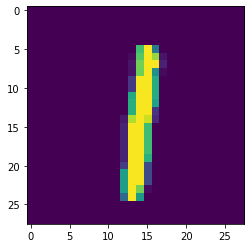

In [9]:
plt.imshow(X_train[40])
plt.show()

In [10]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
#scaling / Normalizing the datas
X_train=X_train/255
X_test=X_test/255

In [10]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
#model building
model = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
                                                    
                           ])

In [15]:
#compiling theneural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#training the neural network
model.fit(X_train,Y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2949 - accuracy: 0.9146
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1345 - accuracy: 0.9601
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0991 - accuracy: 0.9695
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0806 - accuracy: 0.9747
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9787
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0563 - accuracy: 0.9821
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0497 - accuracy: 0.9843
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0441 - accuracy: 0.9853
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0374 - accuracy: 0.9873
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.033

**Training data accuracy is 99.27%**

In [17]:
loss,accuracy=model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1054 - accuracy: 0.9757
0.9757000207901001


Test data accuracy=97.5%

<function matplotlib.pyplot.show(close=None, block=None)>

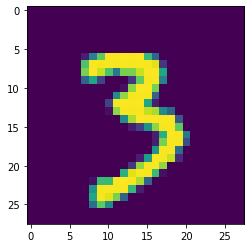

In [18]:
plt.imshow(X_test[30])
plt.show

In [19]:
print(Y_test[30])

3


In [21]:
#checking individual prediction
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [22]:
print(Y_pred.shape)

(10000, 10)


In [23]:
print(Y_pred[30])

[3.1034071e-07 3.6304133e-08 1.7399339e-02 1.0000000e+00 2.8488746e-16
 1.1465253e-03 5.9217307e-16 5.7943773e-05 3.8882042e-04 1.1356708e-02]
